In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import datetime as dt



In [0]:
df = pd.read_csv('datasets/DPD__2015_Homicide_Offenses_-_Victims__Confirmed_.csv')
df.head()


,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,ADDRESS,CITY,STATE,X,Y,Location_1
0,1,05/16/2015 12:00:00 AM,SAT,9:00:00 PM,8,1505160353,224XX SANTA MARIA,DETROIT,MI,-83.262884,42.416376,NaN
1,2,07/04/2015 12:00:00 AM,SAT,9:00:00 PM,2,1507040318,74XX WYKES,DETROIT,MI,-83.141746,42.347843,NaN
2,3,12/03/2105 12:00:00 AM,THUR,8:00:00 AM,8,1512020072,VASSAR AND FERGUSON,DETROIT,MI,-83.210778,42.433874,NaN
3,4,12/23/2015 12:00:00 AM,WED,8:00:00 AM,8,1512230072,191XX ARCHDALE,DETROIT,MI,-83.217157,42.430505,NaN
4,5,03/14/2015 12:00:00 AM,SAT,5:00:00 PM,5,1503140259,46XX COURVILLE,DETROIT,MI,-82.936849,42.399587,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
FID           295 non-null int64
DATE          295 non-null object
DAY           295 non-null object
TIME          295 non-null object
PRECINCT      295 non-null int64
REPORT_NO     295 non-null int64
ADDRESS       295 non-null object
CITY          295 non-null object
STATE         295 non-null object
X             295 non-null float64
Y             295 non-null float64
Location_1    0 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 27.7+ KB


In [0]:
df.describe()

,FID,PRECINCT,REPORT_NO,X,Y,Location_1
count,295.00000,295.000000,2.950000e+02,295.000000,295.000000,0.0
mean,148.00000,7.132203,1.504337e+09,-83.110029,42.389598,NaN
std,85.30338,3.111228,1.609572e+07,0.097570,0.036784,NaN
min,1.00000,1.000000,1.404280e+09,-83.286701,42.264207,NaN
25%,74.50000,5.000000,1.503670e+09,-83.193044,42.359792,NaN
50%,148.00000,7.000000,1.507040e+09,-83.116429,42.393853,NaN
75%,221.50000,9.000000,1.509280e+09,-83.026072,42.420522,NaN
max,295.00000,12.000000,1.512310e+09,-82.924031,42.449087,NaN


# cleaning data

In [0]:
df.isnull().sum()

FID             0
DATE            0
DAY             0
TIME            0
PRECINCT        0
REPORT_NO       0
ADDRESS         0
CITY            0
STATE           0
X               0
Y               0
Location_1    295
dtype: int64

In [0]:
del df['Location_1']
df

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,ADDRESS,CITY,STATE,X,Y
0,1,05/16/2015 12:00:00 AM,SAT,9:00:00 PM,8,1505160353,224XX SANTA MARIA,DETROIT,MI,-83.262884,42.416376
1,2,07/04/2015 12:00:00 AM,SAT,9:00:00 PM,2,1507040318,74XX WYKES,DETROIT,MI,-83.141746,42.347843
2,3,12/03/2105 12:00:00 AM,THUR,8:00:00 AM,8,1512020072,VASSAR AND FERGUSON,DETROIT,MI,-83.210778,42.433874
3,4,12/23/2015 12:00:00 AM,WED,8:00:00 AM,8,1512230072,191XX ARCHDALE,DETROIT,MI,-83.217157,42.430505
4,5,03/14/2015 12:00:00 AM,SAT,5:00:00 PM,5,1503140259,46XX COURVILLE,DETROIT,MI,-82.936849,42.399587
5,6,12/03/2015 12:00:00 AM,THUR,8:00:00 AM,12,1512030122,201XX PICADILLY,DETROIT,MI,-83.137471,42.441911
6,7,05/01/2015 12:00:00 AM,FRI,5:00:00 PM,4,1505010266,48XX CHOPIN,DETROIT,MI,-83.134028,42.332045
7,8,08/29/2015 12:00:00 AM,SAT,8:00:00 AM,12,1508290082,4XX WINCHESTER,DETROIT,MI,-83.107990,42.443934
8,9,07/14/2015 12:00:00 AM,TUE,5:00:00 PM,2,1507140312,81XX NORTHLAWN,DETROIT,MI,-83.151656,42.353541
9,10,06/12/2015 12:00:00 AM,FRI,7:00:00 PM,6,1506120333,142XX CRESCENT,DETROIT,MI,-83.238939,42.390391


convert date to datetime and add year,month,hour,minute colomens

In [0]:
df['DATE'] = pd.to_datetime(df.DATE)
df['TIME'] = pd.to_datetime(df.TIME)
df['year'], df['month'] = df['DATE'].dt.year, df['DATE'].dt.month
df['hour'], df['minute']=df['TIME'].dt.hour ,df['TIME'].dt.minute
df.head()

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,ADDRESS,CITY,STATE,X,Y,year,month,hour,minute
0,1,2015-05-16,SAT,2018-07-06 21:00:00,8,1505160353,224XX SANTA MARIA,DETROIT,MI,-83.262884,42.416376,2015,5,21,0
1,2,2015-07-04,SAT,2018-07-06 21:00:00,2,1507040318,74XX WYKES,DETROIT,MI,-83.141746,42.347843,2015,7,21,0
2,3,2105-12-03,THUR,2018-07-06 08:00:00,8,1512020072,VASSAR AND FERGUSON,DETROIT,MI,-83.210778,42.433874,2105,12,8,0
3,4,2015-12-23,WED,2018-07-06 08:00:00,8,1512230072,191XX ARCHDALE,DETROIT,MI,-83.217157,42.430505,2015,12,8,0
4,5,2015-03-14,SAT,2018-07-06 17:00:00,5,1503140259,46XX COURVILLE,DETROIT,MI,-82.936849,42.399587,2015,3,17,0


In [0]:
df.year == 2015

0       True
1       True
2      False
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
265     True
266     True
267     True
268     True
269     True
270     True
271     True
272     True
273     True
274     True
275     True
276     True
277     True
278    False
279     True
280     True
281     True
282     True
283     True
284     True
285     True
286     True
287     True
288     True
289     True
290     True
291     True
292     True
293     True
294     True
Name: year, Length: 295, dtype: bool

In [0]:
df[df.year==2015]

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,ADDRESS,CITY,STATE,X,Y,year,month,hour,minute
0,1,2015-05-16,SAT,2018-07-06 21:00:00,8,1505160353,224XX SANTA MARIA,DETROIT,MI,-83.262884,42.416376,2015,5,21,0
1,2,2015-07-04,SAT,2018-07-06 21:00:00,2,1507040318,74XX WYKES,DETROIT,MI,-83.141746,42.347843,2015,7,21,0
3,4,2015-12-23,WED,2018-07-06 08:00:00,8,1512230072,191XX ARCHDALE,DETROIT,MI,-83.217157,42.430505,2015,12,8,0
4,5,2015-03-14,SAT,2018-07-06 17:00:00,5,1503140259,46XX COURVILLE,DETROIT,MI,-82.936849,42.399587,2015,3,17,0
5,6,2015-12-03,THUR,2018-07-06 08:00:00,12,1512030122,201XX PICADILLY,DETROIT,MI,-83.137471,42.441911,2015,12,8,0
6,7,2015-05-01,FRI,2018-07-06 17:00:00,4,1505010266,48XX CHOPIN,DETROIT,MI,-83.134028,42.332045,2015,5,17,0
7,8,2015-08-29,SAT,2018-07-06 08:00:00,12,1508290082,4XX WINCHESTER,DETROIT,MI,-83.107990,42.443934,2015,8,8,0
8,9,2015-07-14,TUE,2018-07-06 17:00:00,2,1507140312,81XX NORTHLAWN,DETROIT,MI,-83.151656,42.353541,2015,7,17,0
9,10,2015-06-12,FRI,2018-07-06 19:00:00,6,1506120333,142XX CRESCENT,DETROIT,MI,-83.238939,42.390391,2015,6,19,0
10,11,2015-12-15,TUE,2018-07-06 17:00:00,6,1512150321,93XX PENROD,DETROIT,MI,-83.220300,42.363349,2015,12,17,0


Text(0,0.5,'# of homicides')

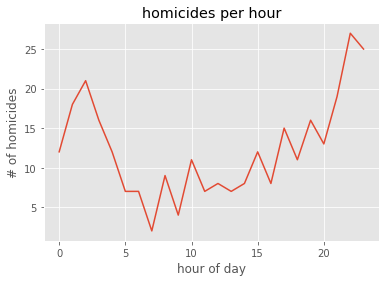

In [0]:
#sorted_hour=df.sort_values(by='hour')
#inc_hour=sorted_hour['hour'].value_counts().sort_index()
inc_hour=df['hour'].value_counts().sort_index()
plt.plot(inc_hour)
plt.title('homicides per hour')
plt.xlabel('hour of day')
plt.ylabel('# of homicides')


In [0]:
d = df.DAY.unique()
print(d)

['SAT' 'THUR' 'WED' 'FRI' 'TUE' 'SUN' 'MON']


In [0]:
day_freq=df.groupby('DAY')
day_frequency=day_freq.size()
day_frequency


DAY
FRI     30
MON     42
SAT     56
SUN     50
THUR    46
TUE     39
WED     32
dtype: int64

Text(0,0.5,'#homicides')

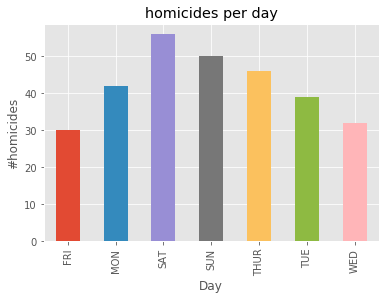

In [0]:
barChart = day_frequency.plot(kind='bar',title="homicides per day")
barChart.set_xlabel("Day")
barChart.set_ylabel("#homicides")

In [0]:
month_freq=df.groupby('month')
month_frequency=month_freq.size()
month_frequency

month
1     22
2     17
3     28
4     15
5     27
6     29
7     19
8     30
9     28
10    20
11    19
12    41
dtype: int64

Text(0,0.5,'homicides')

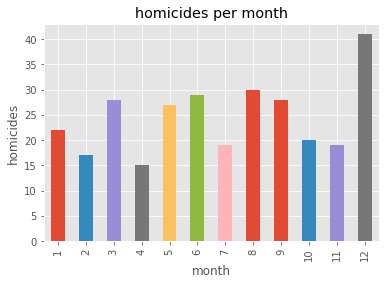

In [0]:
barChart = month_frequency.plot(kind='bar',title="homicides per month")
barChart.set_xlabel("month")
barChart.set_ylabel("homicides")

Text(0,0.5,'homicides')

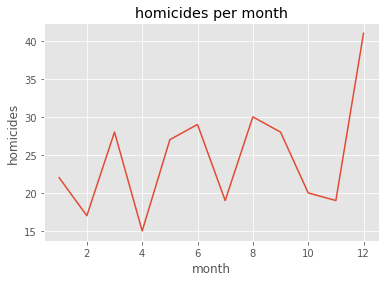

In [0]:
lineChart = month_frequency.plot(kind ='line',title="homicides per month")
lineChart.set_xlabel("month")
lineChart.set_ylabel("homicides")

In [0]:
precinct_frequency=df['PRECINCT'].value_counts()
precinct_frequency.sort_index()


1      2
2     32
3     16
4     22
5     13
6     38
7     28
8     30
9     46
10    17
11    23
12    28
Name: PRECINCT, dtype: int64

Text(0,0.5,'homicides')

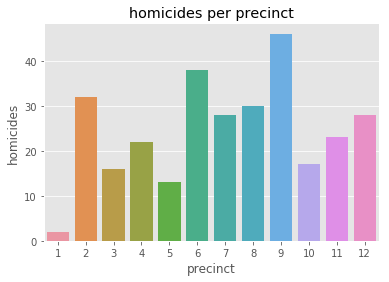

In [0]:
sns.barplot(x=precinct_frequency.index , y=precinct_frequency.values, data=df).set_title("homicides per precinct")
plt.xlabel("precinct")
plt.ylabel("homicides")


In [0]:
df.PRECINCT.count() 

295

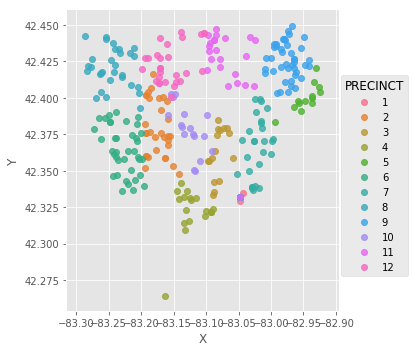

In [0]:

sns.lmplot(x='X', y='Y', data=df,
           fit_reg=False,  # No regression line
           hue='PRECINCT')   # Color for dots
plt.show()

In [0]:
df2 = pd.read_csv('datasets/DPD__2016_Homicide_Offenses_-_Victims__Confirmed_.csv')
df2.head()


,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,LOCATION
0,0,1/1/2016,FRI,11:00:00 PM,12,1601020007,"158XX WARD\nDETROIT, MI\n(42.401088, -82.92513..."
1,1,1/3/2016,SUN,5:00:00 AM,2,1601030073,"122XX SCHAEFER\nDETROIT, MI\n(42.27561996, -83..."
2,2,1/3/2016,SUN,8:00:00 PM,8,1601030253,"184XX STOUT\nDETROIT, MI\n(42.401088, -82.9251..."
3,3,1/4/2016,MON,11:00:00 AM,2,1601040120,"126XX SUSSEX\nDETROIT, MI\n(42.33168, -83.048)"
4,4,1/4/2016,MON,6:00:00 PM,5,1601040317,"11XX NEWPORT\nDETROIT, MI\n(42.3985695, -82.96..."


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 7 columns):
FID          302 non-null int64
DATE         302 non-null object
DAY          302 non-null object
TIME         302 non-null object
PRECINCT     302 non-null int64
REPORT_NO    302 non-null object
LOCATION     302 non-null object
dtypes: int64(2), object(5)
memory usage: 16.6+ KB


In [0]:
df2.isnull().sum()

FID          0
DATE         0
DAY          0
TIME         0
PRECINCT     0
REPORT_NO    0
LOCATION     0
dtype: int64

In [0]:
df2['DATE'] = pd.to_datetime(df2.DATE)
df2['TIME'] = pd.to_datetime(df2.TIME)
df2['year'], df2['month'] = df2['DATE'].dt.year, df2['DATE'].dt.month
df2['hour'], df2['minute']=df2['TIME'].dt.hour ,df2['TIME'].dt.minute
df2.head()

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,LOCATION,year,month,hour,minute
0,0,2016-01-01,FRI,2018-07-06 23:00:00,12,1601020007,"158XX WARD\nDETROIT, MI\n(42.401088, -82.92513...",2016,1,23,0
1,1,2016-01-03,SUN,2018-07-06 05:00:00,2,1601030073,"122XX SCHAEFER\nDETROIT, MI\n(42.27561996, -83...",2016,1,5,0
2,2,2016-01-03,SUN,2018-07-06 20:00:00,8,1601030253,"184XX STOUT\nDETROIT, MI\n(42.401088, -82.9251...",2016,1,20,0
3,3,2016-01-04,MON,2018-07-06 11:00:00,2,1601040120,"126XX SUSSEX\nDETROIT, MI\n(42.33168, -83.048)",2016,1,11,0
4,4,2016-01-04,MON,2018-07-06 18:00:00,5,1601040317,"11XX NEWPORT\nDETROIT, MI\n(42.3985695, -82.96...",2016,1,18,0


In [0]:
df2.year == 2016

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10     False
11     False
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
272     True
273     True
274     True
275     True
276     True
277     True
278     True
279     True
280     True
281     True
282     True
283     True
284     True
285     True
286     True
287     True
288     True
289     True
290     True
291     True
292     True
293     True
294     True
295     True
296     True
297     True
298     True
299     True
300     True
301     True
Name: year, Length: 302, dtype: bool

In [0]:
df2[df2.year==2016]

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,LOCATION,year,month,hour,minute
0,0,2016-01-01,FRI,2018-07-06 23:00:00,12,1601020007,"158XX WARD\nDETROIT, MI\n(42.401088, -82.92513...",2016,1,23,0
1,1,2016-01-03,SUN,2018-07-06 05:00:00,2,1601030073,"122XX SCHAEFER\nDETROIT, MI\n(42.27561996, -83...",2016,1,5,0
2,2,2016-01-03,SUN,2018-07-06 20:00:00,8,1601030253,"184XX STOUT\nDETROIT, MI\n(42.401088, -82.9251...",2016,1,20,0
3,3,2016-01-04,MON,2018-07-06 11:00:00,2,1601040120,"126XX SUSSEX\nDETROIT, MI\n(42.33168, -83.048)",2016,1,11,0
4,4,2016-01-04,MON,2018-07-06 18:00:00,5,1601040317,"11XX NEWPORT\nDETROIT, MI\n(42.3985695, -82.96...",2016,1,18,0
5,5,2016-01-07,THURS,2018-07-06 15:00:00,12,1601070261,"157XX NORTHLAWN\nDETROIT, MI\n(42.37537718, -8...",2016,1,15,0
6,6,2016-01-09,SAT,2018-07-06 14:00:00,2,1601090222,"132XX W. CHICAGO\nDETROIT, MI\n(42.36754157, -...",2016,1,14,0
7,7,2016-01-12,MON,2018-07-06 06:00:00,9,1601120032,"95XX WHITTIER\nDETROIT, MI\n(42.41586357, -82....",2016,1,6,0
8,8,2016-01-12,MON,2018-07-06 14:00:00,5,1601070121,"55XX RADNOR\nDETROIT, MI\n(42.41356777, -82.92...",2016,1,14,0
9,9,2016-01-13,TUES,2018-07-06 10:00:00,8,1601130145,"185XX FIELDING\nDETROIT, MI\n(42.35998216, -83...",2016,1,10,0


In [0]:
precinct_frequency=df2['PRECINCT'].value_counts()
precinct_frequency.sort_index()


2     26
3     15
4     31
5     18
6     28
7     19
8     46
9     43
10    28
11    16
12    32
Name: PRECINCT, dtype: int64

Text(0,0.5,'homicides')

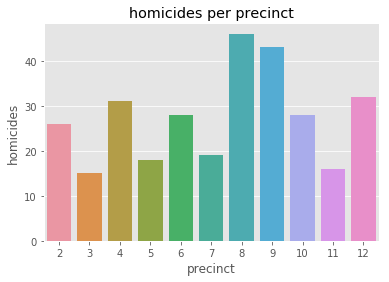

In [0]:
sns.barplot(x=precinct_frequency.index , y=precinct_frequency.values, data=df2).set_title("homicides per precinct")
plt.xlabel("precinct")
plt.ylabel("homicides")

In [0]:
month_freq=df2.groupby('month')
month_frequency=month_freq.size()
month_frequency

month
1     22
2     18
3     17
4     26
5     31
6     27
7     33
8     27
9     25
10    31
11    28
12    17
dtype: int64

Text(0,0.5,'homicides')

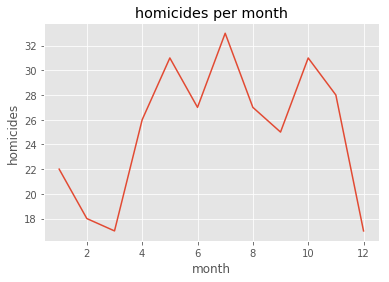

In [0]:
lineChart = month_frequency.plot(kind ='line',title="homicides per month")
lineChart.set_xlabel("month")
lineChart.set_ylabel("homicides")

In [0]:
month_freq=df.groupby('month')
month_frequency_1=month_freq.size()
month_frequency_1

month
1     22
2     17
3     28
4     15
5     27
6     29
7     19
8     30
9     28
10    20
11    19
12    41
dtype: int64

In [0]:
month_freq=df2.groupby('month')
month_frequency_2=month_freq.size()
month_frequency_2

month
1     22
2     18
3     17
4     26
5     31
6     27
7     33
8     27
9     25
10    31
11    28
12    17
dtype: int64

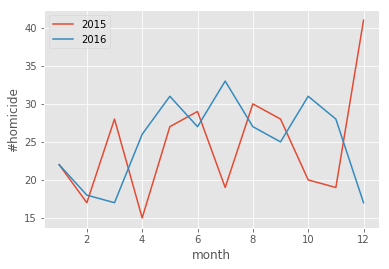

In [0]:
plt.plot(month_frequency_1.index, month_frequency_1.values)
plt.plot(month_frequency_2.index, month_frequency_2.values)
plt.xlabel("month")
plt.ylabel("#homicide")
plt.legend(['2015','2016'])
plt.show()

In [0]:
precinct_frequency_1=df['PRECINCT'].value_counts()
precinct_frequency_1.sort_index()


1      2
2     32
3     16
4     22
5     13
6     38
7     28
8     30
9     46
10    17
11    23
12    28
Name: PRECINCT, dtype: int64

In [0]:
precinct_frequency_2=df2['PRECINCT'].value_counts()
precinct_frequency_2.sort_index()


2     26
3     15
4     31
5     18
6     28
7     19
8     46
9     43
10    28
11    16
12    32
Name: PRECINCT, dtype: int64

Text(0.5,1,'Homicides per precinct for 2015 and 2016')

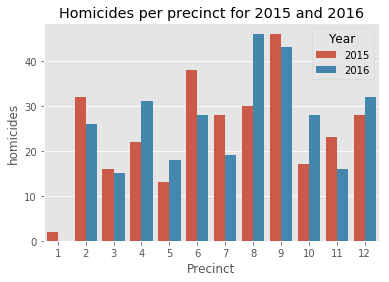

In [0]:

df_1=pd.DataFrame(precinct_frequency_1)
df_2=pd.DataFrame(precinct_frequency_2)
df_1['Year'] = '2015'
df_2['Year'] = '2016'
DF = pd.concat([df_1,df_2])
DF.columns
sns.barplot(x=DF.index,y=DF.PRECINCT,hue=DF.Year)
plt.xlabel('Precinct')
plt.ylabel('homicides')
plt.title("Homicides per precinct for 2015 and 2016")







conclusion:
    In our datasets (homicide offenses 2015,2016 for detroit) there are some precinct have more homicide and that need more care to rduce the homicide offence by add more manpower in these precinct. we can see also from the graph that precinct one is the safest precinct area, which means that manpower in that area may be able to help out other precinct areas that need it more, like precinct 8 & 9
    